In [30]:
import networkx as nx
import math
import random
import numpy as np
import copy

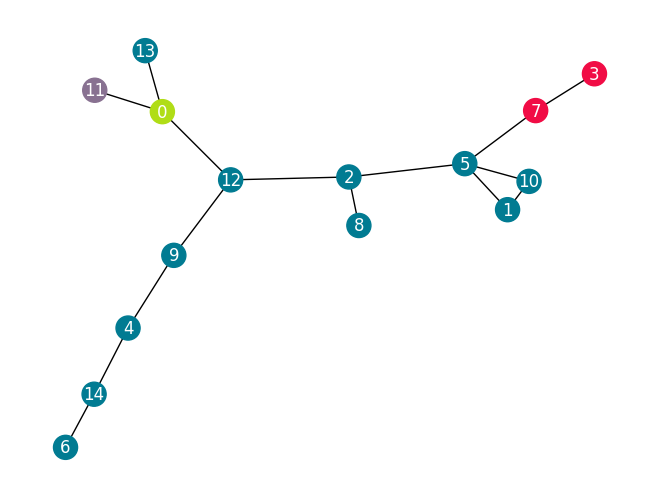

In [57]:
num_nodes = 15
G = nx.connected_watts_strogatz_graph(num_nodes, 3, 1, 30)

obstacle_upper_bound = num_nodes//2
num_obstacles = random.randrange(1, obstacle_upper_bound + 1)
obstacles = random.sample(range(num_nodes), num_obstacles)
obstacles_start = copy.deepcopy(obstacles)

# graph_map = {node: node in obstacles if True else False for node in G}
graph_map = {node: node in obstacles for node in G}
# print(graph_map, obstacles)

potential_robot_positions = [node for node in graph_map if not graph_map[node]]
robot_goal_positions = random.sample(potential_robot_positions, k=2)
robot_pos, goal_pos = robot_goal_positions[0], robot_goal_positions[1]

# for edge in G.edges:
#     G.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
#     G.edges[edge]['weight'] = 1
# print(potential_robot_positions)

# for edge in G.edges:
#     print(G.edges[edge]['weight'])

# Draw the graph with individual node colors
colors = ['xkcd:pinkish red' if node in obstacles else 'xkcd:ocean' for node in graph_map]
colors[robot_pos] = 'xkcd:greyish purple'
colors[goal_pos] = 'xkcd:yellowish green'
nx.draw(G, with_labels=True, node_color=colors, font_color='white')

# pos = nx.spring_layout(G)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels

In [58]:
def check_goal(node):
    if node == goal_pos:
        print("Goal!")
        return True

In [59]:
def move_obstacle(g, node, start_pos, goal_pos, obstacles, stuck_num):
#     possible_moves = sorted([node for node in g[node] if node not in obstacles and node != goal_pos and node != robot_pos])
    
    ## segFault
    if stuck_num == 50:
        return false
    
    possible_moves = sorted([node for node in g[node] if node != goal_pos and node != robot_pos])
    # #recursion
    if len(possible_moves) == 0:
        return False
    #     neighborly_obstacles = [node for node in g[node] if node in obstacles]
    #     if len(neighborly_obstacles) > 0:
    #         obstacle_node = random.sample(neighborly_obstacles, 1)[0]
    #         #recursion
    #         move_obstacle(g, obstacle_node, obstacles, obstacle_poison, num_obstacle_moves, stuck_num+1)
    #         return
    # else:      
    chosen_move = random.sample(possible_moves, k=1)[0]
    if(chosen_move in obstacles):
        #recursion
        return move_obstacle(g, chosen_move, start_pos, goal_pos, obstacles, stuck_num+1)
        
    
    obstacles.remove(node)
    obstacles.append(chosen_move)

    print(f'{node} -> {chosen_move}')
    return True

In [60]:
def move_robot(g, u, obstacles):
    neighbors = [node for node in g[u] if node not in obstacles]
    if len(neighbors) == 0:
        return u

    chosen_move = random.sample(neighbors, k=1)[0]
    return chosen_move

In [61]:
def find_path(g, start_pos, goal_pos, obstacles):
    u = start_pos
    robot_move_prob = 0.8
    robot_moves = 0
    obstacle_moves = 0
    while (True):
        found_goal = check_goal(u)
        if(found_goal):
            break
        
        if (random.random() > robot_move_prob):
            next_node = move_robot(g, u, obstacles)
            if next_node == u:
                u = start_pos
                robot_moves = 0
                continue
            u = next_node
            robot_moves += 1
        else:
            random_obstacle = random.sample(obstacles, k=1)[0]
            obstacle_moves += 1 if move_obstacle(g, random_obstacle, start_pos, goal_pos, obstacles, stuck_num=0) else 0

    return robot_moves + obstacle_moves

In [62]:
find_path(G, robot_pos, goal_pos, obstacles)

7 -> 5
Goal!


2